In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

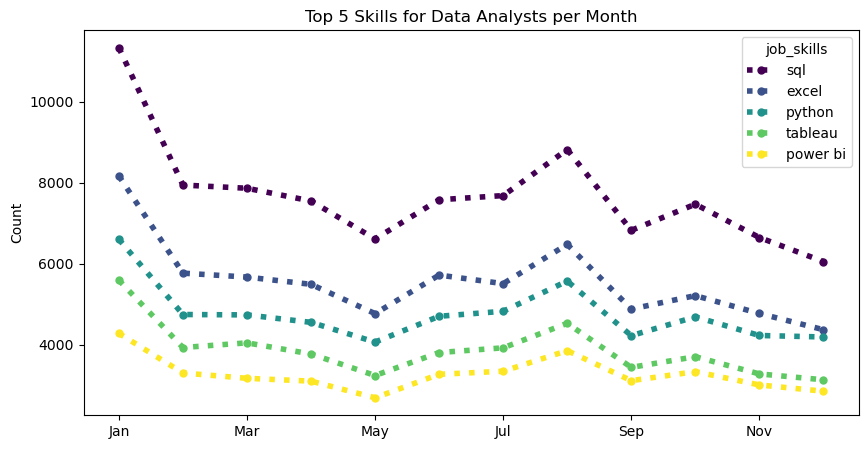

In [12]:
df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

df_da['job_posted_month_no'] = df_da['job_posted_date'].dt.month

df_da_exploded = df_da.explode('job_skills')

df_da_pivot = df_da_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_da_pivot.loc['Total'] = df_da_pivot.sum()

df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]

df_da_pivot = df_da_pivot.drop('Total')

df_da_pivot = df_da_pivot.reset_index()
df_da_pivot['job_posted_month'] = df_da_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_da_pivot = df_da_pivot.set_index('job_posted_month')
df_da_pivot = df_da_pivot.drop(columns='job_posted_month_no')

df_da_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':',
    colormap='viridis',
    marker='o',
    markersize=5,
    figsize=(10,5)
)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

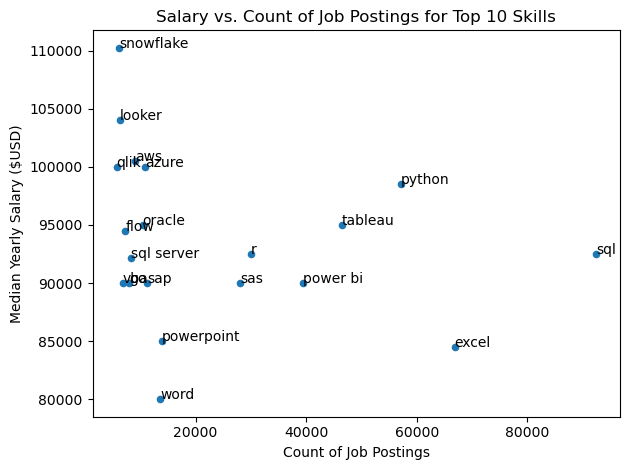

In [16]:
df_exploded = df_da.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(20)

skill_stats.plot(kind='scatter',
    x='skill_count',
    y='median_salary'
)
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i , txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)


plt.show()

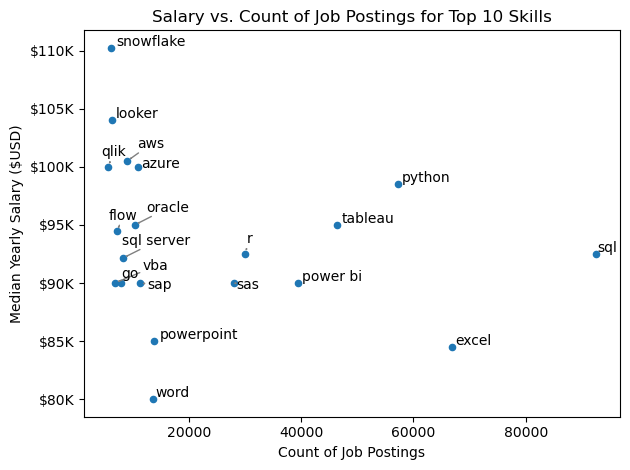

In [24]:
from adjustText import adjust_text


skill_stats.plot(kind='scatter',
    x='skill_count',
    y='median_salary'
)
texts = []
for i , txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()


plt.show()